<a href="https://colab.research.google.com/github/majdsuleiman98/plant_disease/blob/main/Potato_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [ ]:
Image_Size=256
Batch_Size=32
chennels=3
epoches=50

In [ ]:
DataSet = tf.keras.preprocessing.image_dataset_from_directory (
          "/content/drive/MyDrive/PlantVillage",
          batch_size=Batch_Size,
          image_size=(Image_Size,Image_Size),
          shuffle=True
)

Found 2152 files belonging to 3 classes.


In [ ]:
len(DataSet)

68

In [ ]:
class_names=DataSet.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


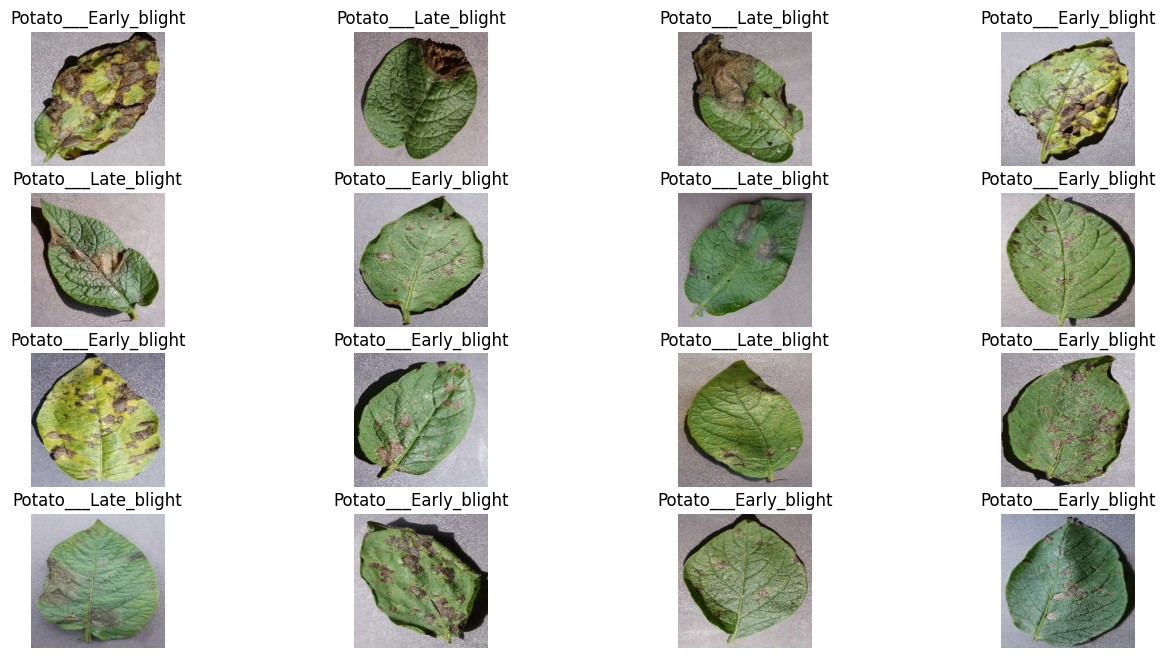

In [ ]:
plt.figure(figsize=(16,8))
for image_batch,label_batch in DataSet.take(1):
  for i in range(0,16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
  # print(image_batch.shape)
  # print(label_batch.numpy())

In [ ]:
def get_dataset_partitions_tf(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  dataset_size=len(dataset)
  if (shuffle):
    dataset = dataset.shuffle(shuffle_size,seed=12)

  train_size = int(dataset_size * train_split)
  val_size   = int(dataset_size * val_split)

  train = dataset.take(train_size)
  validation = dataset.skip(train_size).take(val_size)
  test = dataset.skip(train_size).skip(val_size)

  return train,validation,test

In [ ]:
train,validation,test = get_dataset_partitions_tf(DataSet)
print(len(train),len(validation),len(test))

54 6 8


In [ ]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation = validation.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(Batch_Size,Image_Size,Image_Size,chennels)
num_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 3)             0         
                                                                 
 sequential_1 (Sequential)   (256, 256, 3)             0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(
    train,
    batch_size = Batch_Size,
    epochs = epoches,
    validation_data = validation,
    verbose=1,
)

Epoch 1/50
54/54 [==============================] - 3s 63ms/step - loss: 0.3471 - accuracy: 0.8542 - val_loss: 0.4060 - val_accuracy: 0.8177
Epoch 2/50
54/54 [==============================] - 3s 60ms/step - loss: 0.3324 - accuracy: 0.8611 - val_loss: 0.2788 - val_accuracy: 0.9271
Epoch 3/50
54/54 [==============================] - 3s 60ms/step - loss: 0.2809 - accuracy: 0.8808 - val_loss: 0.7610 - val_accuracy: 0.6927
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.2405 - accuracy: 0.9022 - val_loss: 0.2463 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 3s 62ms/step - loss: 0.2717 - accuracy: 0.8976 - val_loss: 0.1747 - val_accuracy: 0.9375
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.1733 - accuracy: 0.9329 - val_loss: 0.2553 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 3s 60ms/step - loss: 0.1235 - accuracy: 0.9520 - val_loss: 0.1255 - val_accuracy: 0.9531
Epoch 8/50
54

In [ ]:
scores = model.evaluate(test) 

8/8 [==============================] - 4s 28ms/step - loss: 0.1525 - accuracy: 0.9414


In [ ]:
print("The LOSS on test set     : ",scores[0])
print("The ACCURACY on test set : ",scores[1])

The LOSS on test set     :  0.15247873961925507
The ACCURACY on test set :  0.94140625


In [ ]:
 acc = history.history["accuracy"]
 val_acc = history.history["val_accuracy"]

 loss=history.history["loss"]
 val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Trainning Validation Loss')

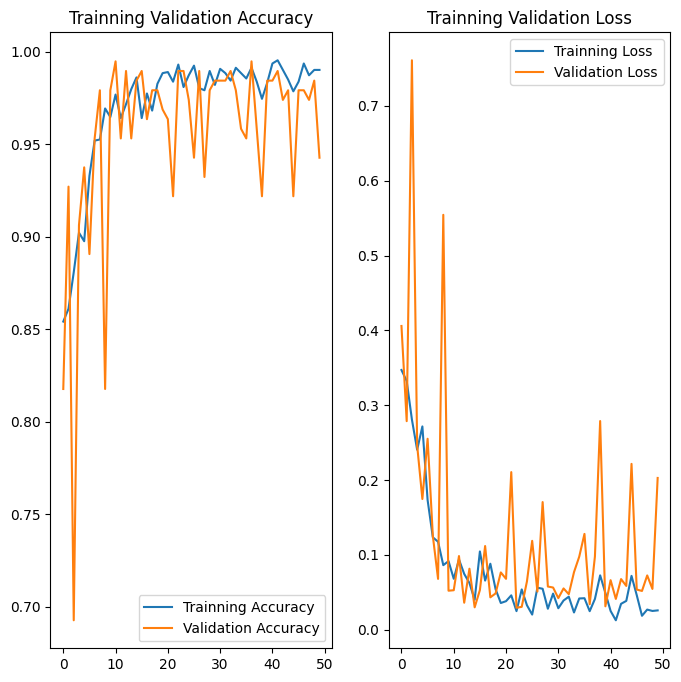

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(epoches),acc,label="Trainning Accuracy")
plt.plot(range(epoches),val_acc,label="Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Trainning Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epoches),loss,label="Trainning Loss")
plt.plot(range(epoches),val_loss,label="Validation Loss")
plt.legend(loc = "upper right")
plt.title("Trainning Validation Loss")

1/1 [==============================] - 0s 63ms/step
actuall label :  Potato___Early_blight
predicted label :  Potato___Early_blight


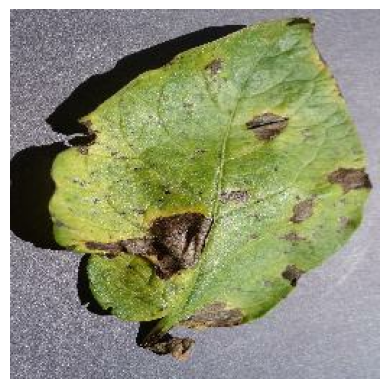

In [ ]:
for image_batch , label_batch in test.take(1):
  first_image = image_batch[0].numpy().astype("uint8")
  first_label = label_batch[0]
  predicteds = model.predict(image_batch)
  predicted_class = predicteds[0]
  plt.imshow(first_image)
  plt.axis("off")
  print("actuall label : ",class_names[first_label])
  print("predicted label : ",class_names[np.argmax(predicted_class)])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 29ms/step


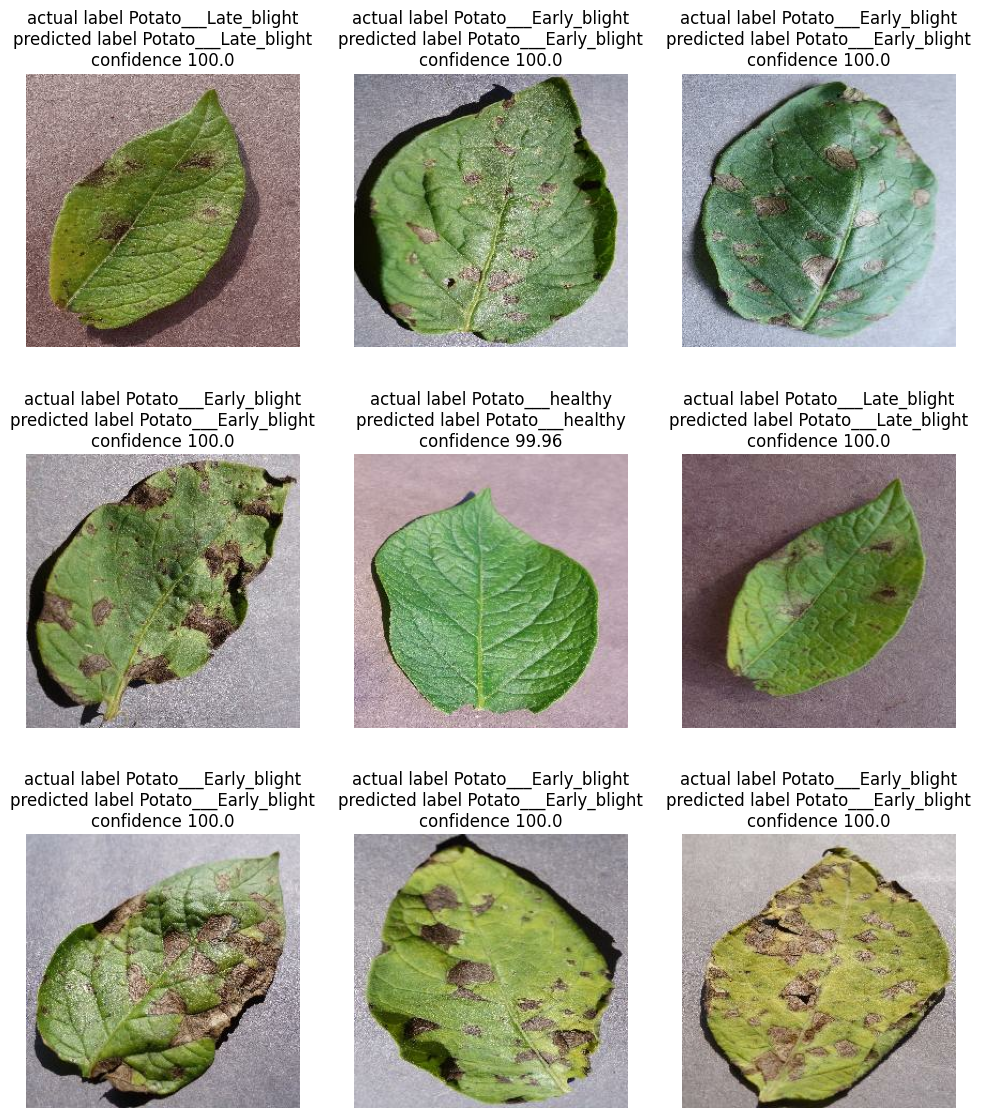

In [ ]:
plt.figure(figsize = (12,14))
for images,labels in test.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class, confidence = predict(model, images[i].numpy())

    plt.title(f"actual label {class_names[labels[i]]}\npredicted label {predicted_class}\nconfidence {confidence}")
    plt.axis("off")

In [ ]:
model.save("/content/drive/MyDrive/potato-disease-detecter")